In [58]:
from IPython.core.display import Image, display

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

## Degrees in Telecommunication Engineering, groups 65, 69, 79 and 95
# A Modern Theory of Detection and Estimation
### Fall 2020

&nbsp;
&nbsp;
&nbsp;
# Lab 1. Machine Learning for Classification

&nbsp;
&nbsp;
&nbsp;

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;

Name:Adrián Francisco Brenes Martínez
&nbsp;

NIA:100406636



<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Spam filter data set

[Spam filtering](https://archive.ics.uci.edu/ml/datasets/spambase) is a classic benchmark from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). The task consists in to classify an income email as spam or desired based on 57 features. The features are engineered from the raw emails and include:

  - 48 continuous real variables in $[0,100]$ *word_freq_WORD*: frequency of word *WORD* in the email (in percentage)
  - 6 continuous real variables in $[0,100]$ *char_freq_CHAR*: frequency of character *CHAR* in the email (in percentage)
  - 1 continuous real variable: average length of the sequences of uninterrupted capital letters 
  - 1 continuous real variable: length of the longest  sequence of uninterrupted capital letters 
  - 1 continuous real variable: total count of capital letters in the email

In [60]:
import pandas as pd
import numpy as np
def load_spam():
  data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
  data.columns=["wf_make",         
"wf_address",      
"wf_all",          
"wf_3d",           
"wf_our",          
"wf_over",         
"wf_remove",       
"wf_internet",     
"wf_order",        
"wf_mail",         
"wf_receive",      
"wf_will",         
"wf_people",       
"wf_report",       
"wf_addresses",    
"wf_free",         
"wf_business",     
"wf_email",        
"wf_you",          
"wf_credit",       
"wf_your",         
"wf_font",         
"wf_000",          
"wf_money",        
"wf_hp",           
"wf_hpl",          
"wf_george",       
"wf_650",          
"wf_lab",          
"wf_labs",         
"wf_telnet",       
"wf_857",          
"wf_data",         
"wf_415",          
"wf_85",           
"wf_technology",   
"wf_1999",         
"wf_parts",        
"wf_pm",           
"wf_direct",       
"wf_cs",           
"wf_meeting",      
"wf_original",     
"wf_project",      
"wf_re",           
"wf_edu",          
"wf_table",        
"wf_conference",   
"cf_;",            
"cf_(",            
"cf_[",            
"cf_!",            
"cf_$",            
"cf_#",            
"cap_average", 
"cap_longest", 
"cap_total",
"target"]
  return data

In [61]:
data = load_spam()
print("Loaded {0:d} observations with {1:d} columns\n".format(len(data), len(data.columns)))
X = data[data.columns[:57]].values
Y = data['target'].values
print("{0:d} observations with {1:d} columns".format(X.shape[0], X.shape[1]))
print("{0:d} targets".format(len(Y)))
print("Values of the targets:")
print(np.unique(Y))

Loaded 4601 observations with 58 columns

4601 observations with 57 columns
4601 targets
Values of the targets:
[0 1]


## Separation in training and test set

First partition the dataset moving a 70% of the observations to the training set and  and the remaining 30% to the test set. **You will work with the training partition most of the assignment**, and leave the test partition for the final cells.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you.

For simplicity, use the names `X_train, X_test, y_train, y_test` for the corresponding numpy arrays.


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

# 1. First exploration of the input variables with histograms

## 1.1 histograms
* Plot histogram of each variable and see overlapping

* Use only training data




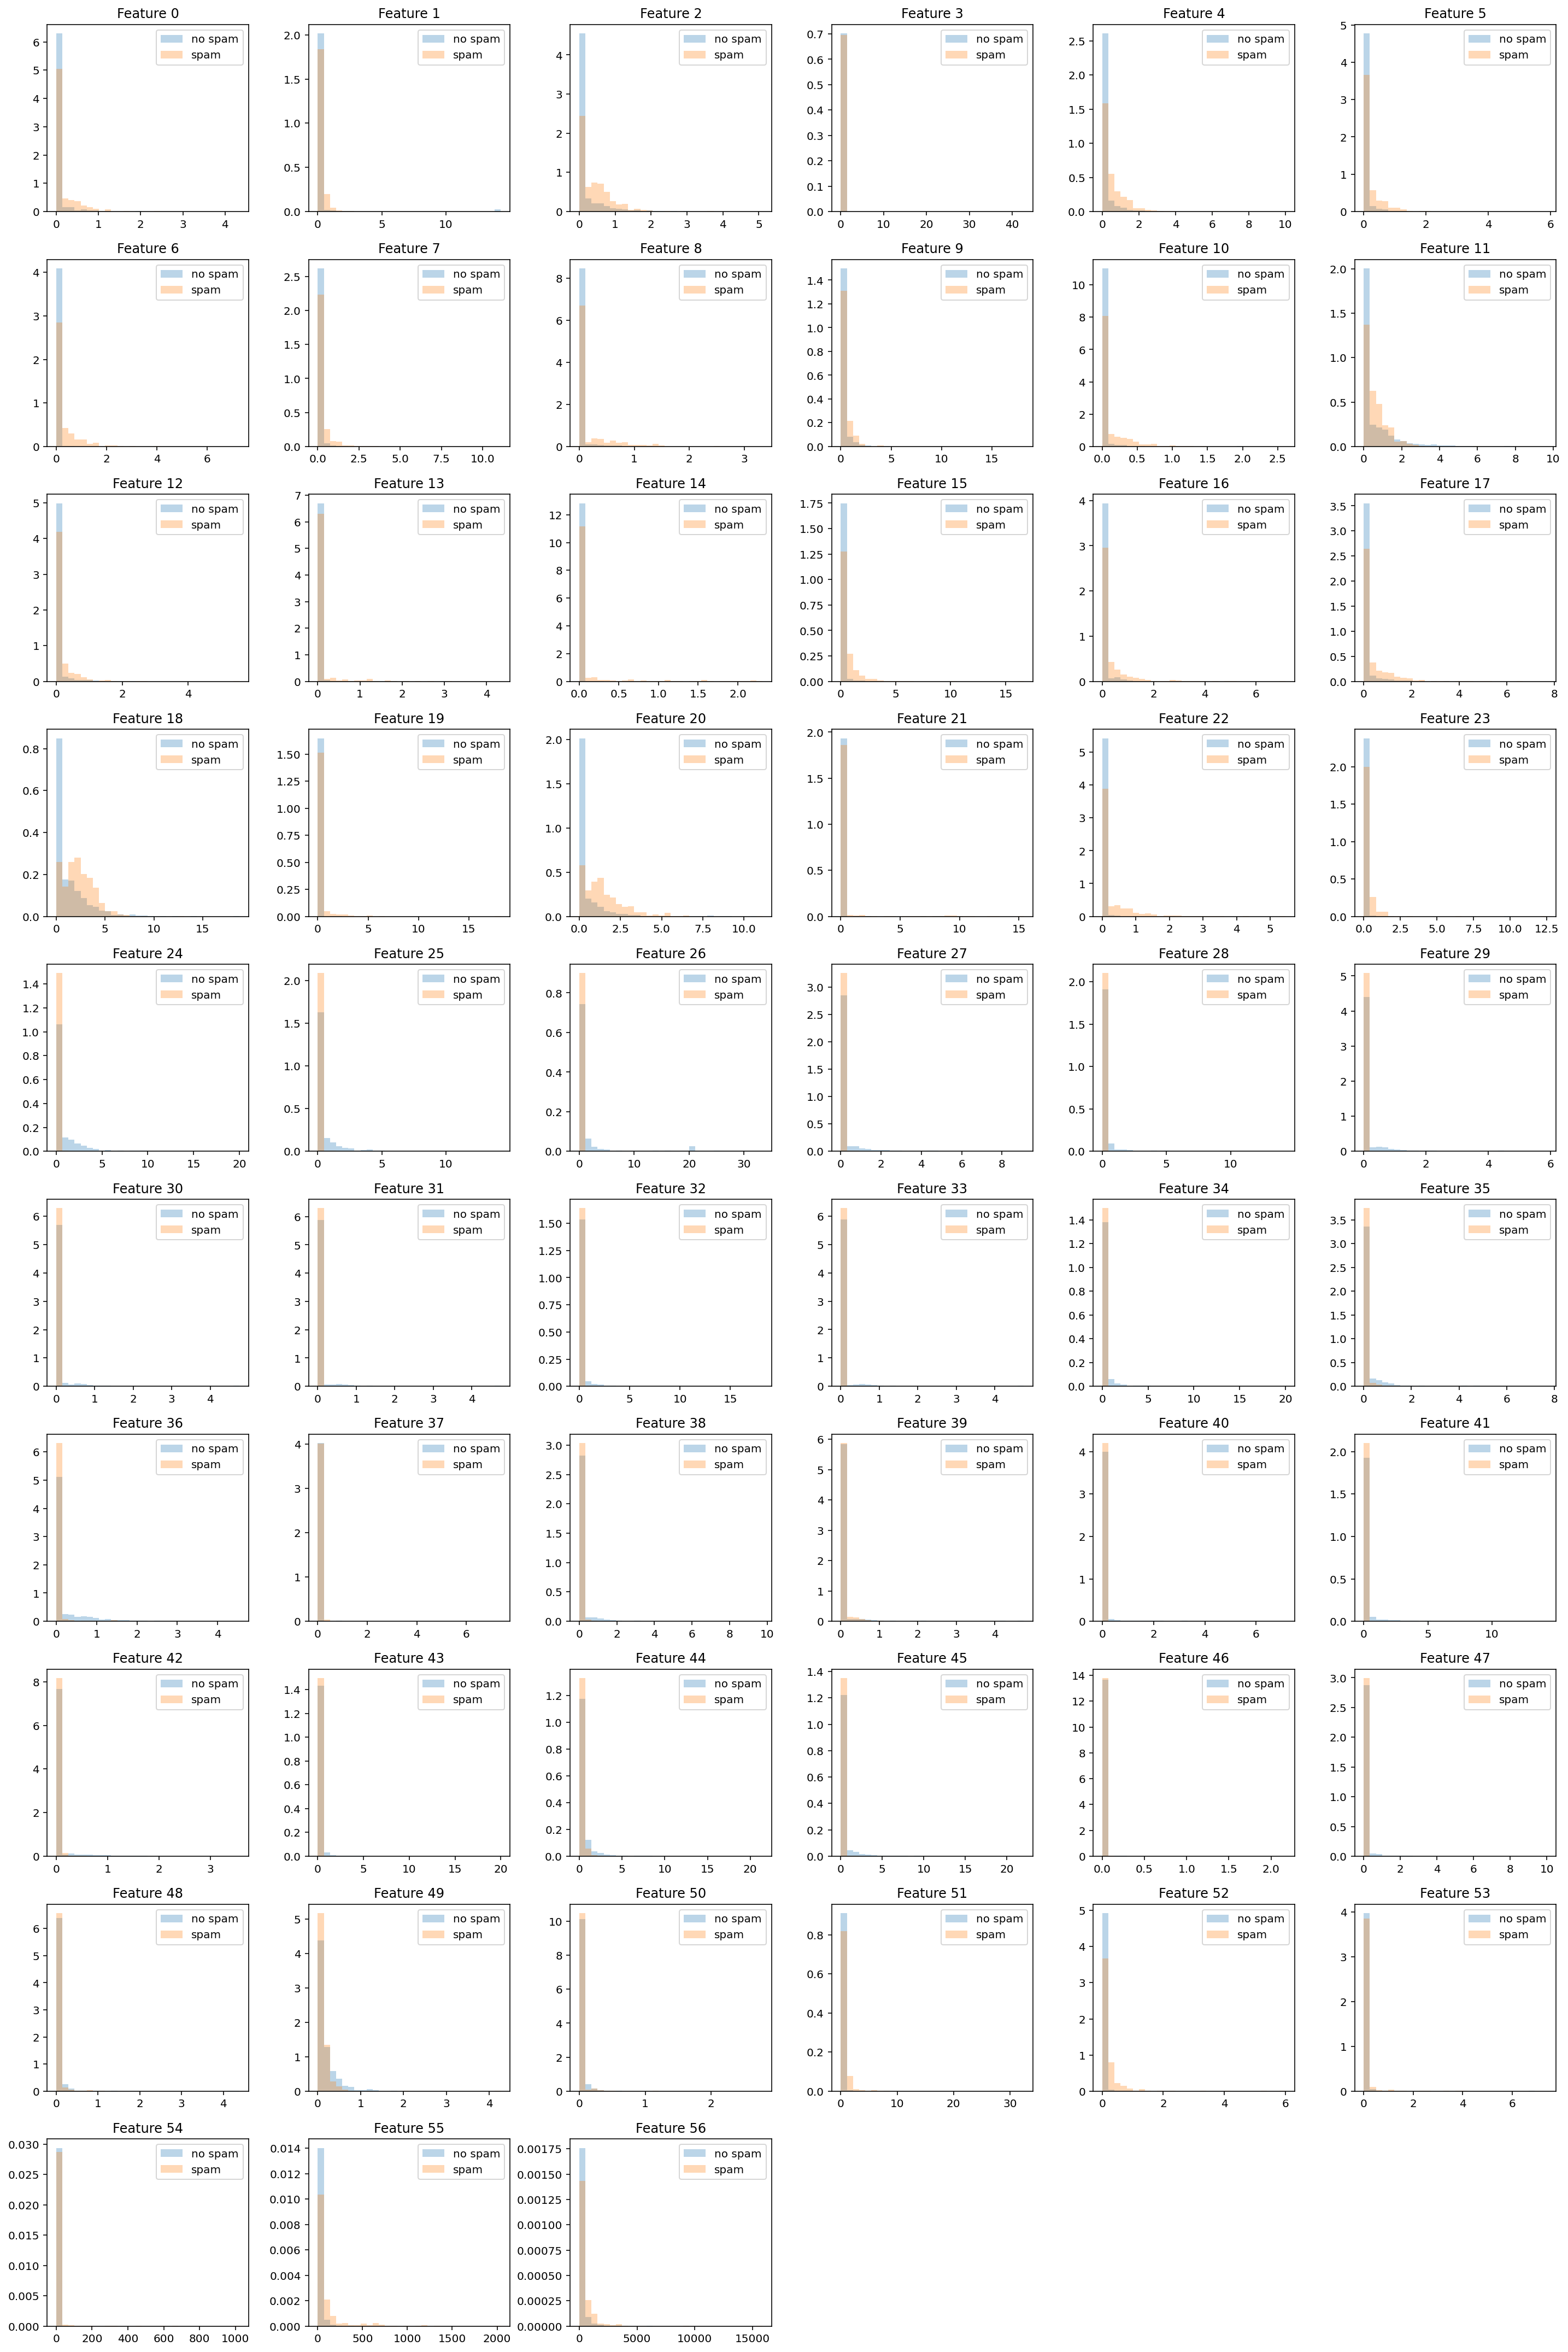

In [63]:
import matplotlib.pyplot as plt

D = X_train.shape[1]
plt.figure( figsize=(20,30))
for d in range (D):
  plt.subplot(10,6,d+1)
  my_bins = np.histogram(X_train[:,d],30)[1]
  plt.hist(X_train[y_train==0,d],my_bins,label='no spam',density=True,histtype='stepfilled',alpha=0.3)
  plt.hist(X_train[y_train==1,d],my_bins,label='spam',density=True,histtype='stepfilled',alpha=0.3)
 
  plt.title('Feature ' + str(d))
  plt.legend()
plt.tight_layout()

# 2. Background: Fundamentals on the application of machine learning methods

In this assignment you are going to explore the capabilities of some machine learning methods to solve the spam filter classification task. This section reviews some of the basic steps you must follow to apply a machine learning method to a data analysis problem.

## 2.1. Scale the inputs
The ranges of variation of the variables that conform the observation can be very different. Therefore a common pre-processing operation consists in to normalize the input variables so that they end up with comparable ranges.

Perhaps the most used scaling within the machine learning community is the standardization. This is a linear transformation that leaves each variable with 0 mean and unit variance. Basically you need to transform every variable in every observation by subtracting its mean and dividing by its standard deviation.

Scikit learn model [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) can perform this job for you.


**Your first task is to scale the data. For this purpose, in the next cell, perform the following operations.**
- Create an instance of `StandardScaler'
- Fit the scaler with the training data
- Create two new arrays:
  - `X_train_s` Contains the result of transforming `X_train` with the scaler
  - `X_test_s` Contains the result of transforming `X_test` with the scaler

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
# Check the normalization process
print("Mean of X_train")
print(np.mean(X_train,0))
print("")
print("Mean of X_train_s")
print(np.mean(X_train_s,0))
print("")
print("Mean of X_test")
print(np.mean(X_test,0))
print("")
print("Mean of X_test_s")
print(np.mean(X_test_s,0))
print("")

Mean of X_train
[9.62453416e-02 2.13167702e-01 2.77130435e-01 7.39192547e-02
 3.00012422e-01 9.56770186e-02 1.14124224e-01 1.05897516e-01
 8.71552795e-02 2.29459627e-01 5.74223602e-02 5.39186335e-01
 8.80993789e-02 5.35807453e-02 4.52950311e-02 2.36413043e-01
 1.45819876e-01 1.88850932e-01 1.63190062e+00 9.11521739e-02
 7.82549689e-01 1.13248447e-01 9.99937888e-02 8.82360248e-02
 5.61229814e-01 2.64531056e-01 8.21972050e-01 1.39562112e-01
 1.07229814e-01 1.07347826e-01 6.70931677e-02 5.03602484e-02
 1.03208075e-01 5.13105590e-02 1.15229814e-01 1.06611801e-01
 1.35040373e-01 1.06459627e-02 7.54161491e-02 6.69689441e-02
 4.86801242e-02 1.33714286e-01 4.41583851e-02 8.82919255e-02
 2.99711180e-01 2.07071429e-01 5.86024845e-03 3.61118012e-02
 3.57543478e-02 1.39349379e-01 1.55639752e-02 2.72560559e-01
 7.51481366e-02 3.99462733e-02 5.03459068e+00 4.73065217e+01
 2.68990994e+02]

Mean of X_train_s
[ 5.38856291e-16  2.15140190e-16 -7.36798476e-16 -3.79410961e-16
  1.19823061e-15  3.79320454e


## 2.2. Estimation of hyperparameters with grid search

The performance of most of the machine learning algorithms depends strongly on the selected values for the hyperparameters. In the case of Random Forest for instance you will consider the number of trees, $k$, and the maximum number of leaves per tree as hyperparameters. 

The training (with method `fit`) of the RF grows optimally all the trees in the forest by finding optimal values for the binary tests performed in each branch node of each tree. But before calling `fit`, one needs to instantiate the RF with suitable values for all the hyperparameters (number of trees and number of leaves per tree in this case).

A common way of finding values for these hyperparameters is a **grid search** with **cross validation**.

### 2.2.1. Grids of hyperparameters

This method consists in to form a **grid** with a number of dimensions equal to the number of hyperparameters that one needs to optimize. The size of each dimension of the grid is equal to the number of values in the range of the corresponding hyperparameter. Notice that this method explores **discrete** ranges for each hyperparameter.

In the example of the Random Forest  we will explore the following ranges:

- `n_estimators` $ \in [10, 20, 50, 100, 200, 500, 1000]$
- `max_leaf_nodes` $ \in [5, 10, 20, 50]$

Notice these ranges determine a $7\times 4$ grid: 28 different combinations of pairs (`n_estimators`, `max_leaf_nodes`)  in the grid. 

In models that depend on a larger number of hyperparameters one has to be careful with the granularity of the ranges as the combinatorial explosion of the size of the grid can be hard to manage.

### 2.2.2. Cross validation 

Cross validation is a commonly used procedure in machine learning to simulate the effect of training a model with a set of data and evaluate its generalization capabilities as the performance in a **separate dataset**. 

The cross validation process involves the following steps:

- Randomly partition the training dataset in $N$ disjoint subsets of similar sizes. Each of this subsets is called **fold** in machine learning jargon. Hence the term **N-fold cross validation**.

- Let us suppose we have chosen $N=3$ folds. This means the training data has been split in three subsets: $(X_1, Y_1)$, $(X_2, Y_2)$ y $(X_3, Y_3)$. 

- Create an instance of the model with the corresponding hyperparameters. The cross validation follows with the execution of the following loop

    For $n=1,2,\dots,N$ iterations:  
    1. Choose $(X_n,Y_n)$ as **validation set** for iteration $n$
    2. Prepare a **training set** for iteration $n$ joining the rest of the subsets (excluding the validation set)
    3. Fit the model instance with the training set of step 2
    4. Evaluate  the model instance (method `score`) with the validation set of step 1
    5. Keep the *score* achieved in the $n$ iteration

- Once the loop is finished, we have $N$ scores, each corresponding to the evaluation of the model fitted in each iteration with the corresponding validation set.
- Estimate the **real score** that an instance of the model fitted using all the data would yield in a separate dataset computing the **mean** and **standard deviation** of the $N$ validation scores.

Typical values for the number of folds include $N\in \{3, 5, 10\}$


### 2.2.3. Cross validation to explore the grid

The grid is explored by a loop that visits all its nodes that runs a cross validation. The process details are the following:

For each node of the grid:  
1. Create an instance of the model with the hyperparameters set to the values that define that node of the grid
2. Run a **cross validation** to estimate the test performance that the model would yield if it were fitted using the values for hyperparameter that correspond to that node. 
3. Store the cross validation score for that node of the grid.

Once all the nodes of the grid have been cross validated, the procedure outputs the combination of hyperparameters that achieved the best performance in cross validation. 

### 2.2.4 Grid search in sklearn

There is a module in sklearn that implements this algorithm for exploring a grid of hyperparameters with cross validation: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)


## 2.3. Evaluation of the training and evaluation times with cross_validate

Besides the classification accuracy there are other relevant measures that can help you decide for a machine learning method or another. These metrics include the **time needed to train the method** and the **time needed to evaluate a test set** with an already trained method.

An immediate way of estimating these metrics is to run the method several times and compute some statistics. Cross validation is a clean way to obtain more or less robust estimations of these quantities. Sklearn provides an stand-alone (besides the one in GridSearch) implementation of cross validation in module [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate). This module outputs a very complete information, including:
  - `test_score`: result of the test of each validation *fold*, 
  - `fit_time`: time to fit each *fold*,
  - `score_time`: time to run the test in each fold.
  









# 3. Study of $k$NN

## 3.1. Ranges for hyperparameters
- `n_neighbors` $\in \{1, 3, 5, 7, 10, 15, 20, 50, 100, 200, 500\}$
- `weights` $\in$ {`'distance'`, `'uniform'`}

Do a grid search to find out which are the best values for the hyperparameters.

Try the data with and without scaling

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,3,5,7,10,15,20,50,100,200,500],'weights':('distance','uniform')}
print (parameters)
grid1=GridSearchCV(knn, parameters,scoring='accuracy',cv=5)
grid2=GridSearchCV(knn,parameters,cv=10,scoring='accuracy')
grid1.fit(X_train,y_train)
grid2.fit(X_train_s,y_train)
knn_no_s_best_params=grid1.best_params_
knn_no_s_best_score=grid1.best_score_
knn_s_best_params=grid2.best_params_
knn_s_best_score=grid2.best_score_

print("Best Parameters kNN without scaling")
print(knn_no_s_best_params)
print('Best Score kNN {0:.2f}%'.format(knn_no_s_best_score))
print("")
print("Best Parameters kNN with scaling")
print(knn_s_best_params)
print('Best Score kNN {0:.2f}%'.format(knn_s_best_score))




{'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 50, 100, 200, 500], 'weights': ('distance', 'uniform')}
Best Parameters kNN without scaling
{'n_neighbors': 10, 'weights': 'distance'}
Best Score kNN 0.82%

Best Parameters kNN with scaling
{'n_neighbors': 10, 'weights': 'distance'}
Best Score kNN 0.92%


## 3.2. Fitting and evaluation time

**Your next task will be to use cross_validate to estimate (give mean and standard deviation) the training time and the evaluation time of the two methods using the best set of hyperparameters in terms of accuracy found in the previous cell.**

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

In [66]:
knn=KNeighborsClassifier(n_neighbors=10, weights='distance')
scores= cross_validate(knn,X_train_s,y_train, cv=5, scoring='accuracy')
knn_s_fit_time=scores['fit_time']
knn_s_score_time=scores['score_time']
mean_fit_time=np.mean(knn_s_fit_time)
std_fit_time=np.std(knn_s_fit_time)
mean_score_time=np.mean(knn_s_score_time)
std_score_time=np.std(knn_s_score_time)


print('Fit Time Mean:', mean_fit_time)
print ('Fit Time Standard Deviation', std_fit_time)
print('Score Time Mean:', mean_score_time)
print ('Score Time Standard Deviation', std_score_time)

Fit Time Mean: 0.018129301071166993
Fit Time Standard Deviation 0.0018695346465125975
Score Time Mean: 0.16660809516906738
Score Time Standard Deviation 0.004894805200202029


#4. Study of Decision Trees

## 4.1. Ranges of parameters
`max_leaf_nodes` $\in \{3,5,10,20,50\}$



In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT=tree.DecisionTreeClassifier()
DT_params={'max_leaf_nodes':[3,5,10,20,50]}
DT_grid1=GridSearchCV(DT,DT_params,scoring='accuracy',cv=5)
DT_grid2=GridSearchCV(DT,DT_params,cv=5,scoring='accuracy')
DT_grid1.fit(X_train,y_train)
DT_grid2.fit(X_train_s,y_train)
dt_no_s_best_params=DT_grid1.best_params_
dt_no_s_best_score=DT_grid1.best_score_
dt_s_best_params=DT_grid2.best_params_
dt_s_best_score=DT_grid2.best_score_
print("Best Parameters DT without scaling")
print(dt_no_s_best_params)
print('Best Score DT {0:.2f}%'.format(dt_no_s_best_score))
print("")
print("Best Parameters DT with scaling")
print(dt_s_best_params)
print('Best Score DT {0:.2f}%'.format(dt_s_best_score))


Best Parameters DT without scaling
{'max_leaf_nodes': 50}
Best Score DT 0.92%

Best Parameters DT with scaling
{'max_leaf_nodes': 50}
Best Score DT 0.92%


## 4.2. Fitting and evaluation time

**Your next task will be to use cross_validate to estimate (give mean and standard deviation) the training time and the evaluation time of the two methods using the best set of hyperparameters in terms of accuracy found in the previous cell.**

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

In [68]:
DT=tree.DecisionTreeClassifier(max_leaf_nodes=50)
dt_scores=cross_validate(DT,X_train_s,y_train,cv=5,scoring='accuracy')
dt_s_fit_time=dt_scores['fit_time']
dt_s_score_time=dt_scores['score_time']
dt_mean_fit_time=np.mean(dt_s_fit_time)
dt_std_fit_time=np.std(dt_s_fit_time)
dt_mean_score_time=np.mean(dt_s_score_time)
dt_std_score_time=np.std(dt_s_score_time)
print('Fit Time Mean:', dt_mean_fit_time)
print ('Fit Time Standard Deviation', dt_std_fit_time)
print('Score Time Mean:', dt_mean_score_time)
print ('Score Time Standard Deviation', dt_std_score_time)

Fit Time Mean: 0.0325223445892334
Fit Time Standard Deviation 0.0022572388570653943
Score Time Mean: 0.0008924007415771484
Score Time Standard Deviation 3.073362527470969e-05


# 5. Study of Random Forests
- `n_estimators` $ \in \{10, 20, 50, 100, 200, 500, 1000\}$
- `max_leaf_nodes` $ \in \{5, 10, 20, 50\}$


In [69]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

RF=ensemble.RandomForestClassifier()
RF_params={'n_estimators':[10,20,50,100,200,500,1000],'max_leaf_nodes':[3,5,10,20,50]}
RF_grid1=GridSearchCV(RF,RF_params,scoring='accuracy',cv=5)
RF_grid2=GridSearchCV(RF,RF_params,cv=5,scoring='accuracy')
RF_grid1.fit(X_train,y_train)
RF_grid2.fit(X_train_s,y_train)
rf_no_s_best_params=RF_grid1.best_params_
rf_no_s_best_score=RF_grid1.best_score_
rf_s_best_params=RF_grid2.best_params_
rf_s_best_score=RF_grid2.best_score_

print("Best Parameters RF without scaling")
print(rf_no_s_best_params)
print('Best Score RF {0:.2f}%'.format(rf_no_s_best_score))
print("")
print("Best Parameters RF with scaling")
print(rf_s_best_params)
print('Best Score RF {0:.2f}%'.format(rf_s_best_score))


Best Parameters RF without scaling
{'max_leaf_nodes': 50, 'n_estimators': 50}
Best Score RF 0.94%

Best Parameters RF with scaling
{'max_leaf_nodes': 50, 'n_estimators': 50}
Best Score RF 0.94%


## 5.2. Fitting and evaluation time

**Your next task will be to use cross_validate to estimate (give mean and standard deviation) the training time and the evaluation time of the two methods using the best set of hyperparameters in terms of accuracy found in the previous cell.**

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

In [70]:
RF=ensemble.RandomForestClassifier(n_estimators=50,max_leaf_nodes=50)
rf_scores=cross_validate(RF,X_train_s,y_train,cv=5,scoring='accuracy')
rf_s_fit_time=rf_scores['fit_time']
rf_s_score_time=rf_scores['score_time']
rf_mean_fit_time=np.mean(rf_s_fit_time)
rf_std_fit_time=np.std(rf_s_fit_time)
rf_mean_score_time=np.mean(rf_s_score_time)
rf_std_score_time=np.std(rf_s_score_time)
print('Fit Time Mean:', rf_mean_fit_time)
print ('Fit Time Standard Deviation', rf_std_fit_time)
print('Score Time Mean:', rf_mean_score_time)
print ('Score Time Standard Deviation', rf_std_score_time)

Fit Time Mean: 0.18696193695068358
Fit Time Standard Deviation 0.0048750950768221375
Score Time Mean: 0.007356405258178711
Score Time Standard Deviation 0.00011332965776894749


#6. Study of SVM

# 6.1 Ranges for hyperparameters
- width of the RBF kernel function $\gamma \in \{0.1, 1, 10\}$ 
- Soft margin $C \in \{0.1, 1, 10, 100, 1000\}$


In [71]:
from sklearn import svm

SVC=svm.SVC()
SVC_params={'tol':[0.1,1,10],'C':[0.1,1,10,100,1000]}
SVC_grid1=GridSearchCV(SVC,SVC_params,scoring='accuracy',cv=5)
SVC_grid2=GridSearchCV(SVC,SVC_params,cv=5,scoring='accuracy')
SVC_grid1.fit(X_train,y_train)
SVC_grid2.fit(X_train_s,y_train)
svc_no_s_best_params=SVC_grid1.best_params_
svc_no_s_best_score=SVC_grid1.best_score_
svc_s_best_params=SVC_grid2.best_params_
svc_s_best_score=SVC_grid2.best_score_
print("Best Parameters SVM without scaling")
print(svc_no_s_best_params)
print('Best Score SVM {0:.2f}%'.format(svc_no_s_best_score))
print("")
print("Best Parameters SVM with scaling")
print(svc_s_best_params)
print('Best Score SVC {0:.2f}%'.format(svc_s_best_score))


Best Parameters SVM without scaling
{'C': 1000, 'tol': 0.1}
Best Score SVM 0.90%

Best Parameters SVM with scaling
{'C': 10, 'tol': 1}
Best Score SVC 0.93%


## 6.2. Fitting and evaluation time

**Your next task will be to use cross_validate to estimate (give mean and standard deviation) the training time and the evaluation time of the two methods using the best set of hyperparameters in terms of accuracy found in the previous cell.**

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

In [72]:
SVC=svm.SVC(C=1,tol=1)
svc_scores=cross_validate(SVC,X_train_s,y_train,cv=5,scoring='accuracy')
svc_s_fit_time=svc_scores['fit_time']
svc_s_score_time=svc_scores['score_time']
svc_mean_fit_time=np.mean(svc_s_fit_time)
svc_std_fit_time=np.std(svc_s_fit_time)
svc_mean_score_time=np.mean(svc_s_score_time)
svc_std_score_time=np.std(svc_s_score_time)
print('Fit Time Mean:', svc_mean_fit_time)
print ('Fit Time Standard Deviation', svc_std_fit_time)
print('Score Time Mean:', svc_mean_score_time)
print ('Score Time Standard Deviation', svc_std_score_time)

Fit Time Mean: 0.19469552040100097
Fit Time Standard Deviation 0.005211805619725716
Score Time Mean: 0.04282598495483399
Score Time Standard Deviation 0.0022626607922722522


Finer tune of parameters of SVM, to save time, as SVM is faster to train and evaluate than RF

# 7. Tuning SVM
## 7.1. Dependence of the SVC performance with $\gamma$

Now you will get some insights on the role of each parameter in the performance of the SVM.

First you will analyze the spread of the kernel, $\gamma$.

Fix $C$ to the best value found in the initial guess and plot the cross validation error vs. $\gamma$ for a wide range of values of $\gamma$. Since $\gamma$ could be any real positive number, it is advised to start by defining a logarithmic scale range in order to cover several orders of magnitude and then refine it.

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

And don't forget to use standardized data.


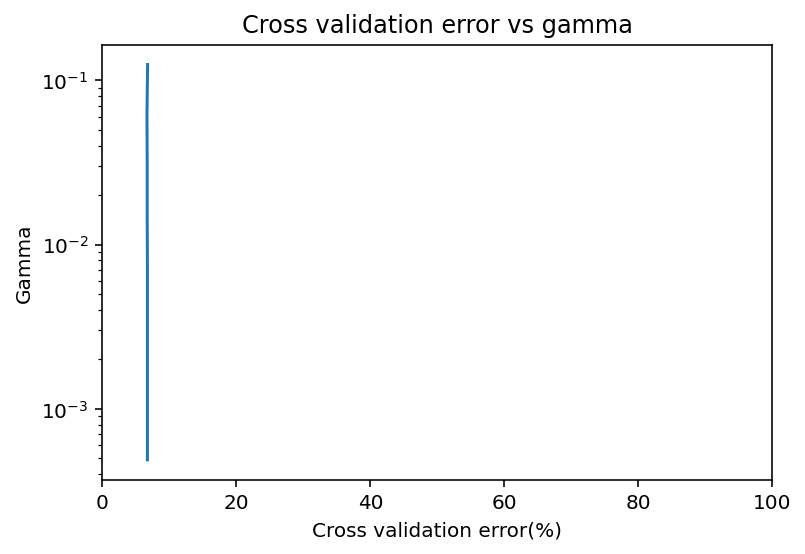

In [73]:
import math
start = -11
end = -3
gamma=np.logspace(start, end,9,base=2.0)
scores=np.zeros(len(gamma))
cv_error=np.zeros(len(gamma))
for i in gamma:
  SVC=svm.SVC(C=1,tol=i)
  svc_cv=cross_validate(SVC,X_train_s,y_train,cv=5, scoring='accuracy')
  svc_test_score=svc_cv['test_score']
  index=int((math.log2(i))+(0-start))
  scores[index]=np.mean(svc_test_score)
  cv_error[index]=(1-scores[index])*100
plt.title('Cross validation error vs gamma')
plt.xlabel('Cross validation error(%)')
plt.ylabel('Gamma')
plt.xlim([0,100])
plt.yscale('log')
plt.plot(cv_error,gamma)
plt.show()

##7.2. Dependence of the SVC performance with $C$

Now fix the value of $\gamma$ to the best you found in section 4 and plot the dependence of the cross validation error of the SVM with the value of $C$. Since $C$ could be any real positive number, it is advised to start by defining a logarithmic scale range in order to cover several orders of magnitude and then refine it.

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

And don't forget to use standardized data.


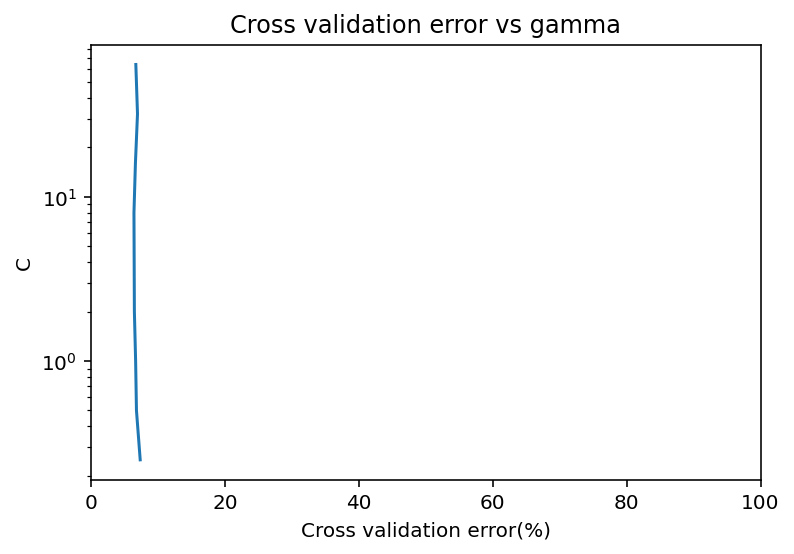

In [74]:
import math
start = -2
end = 6
dif=end-start+1
C=np.logspace(start, end,dif,base=2.0)
scores=np.zeros(len(C))
cv_error=np.zeros(len(C))
for i in C:
  SVC=svm.SVC(C=i,tol=1)
  svc_cv=cross_validate(SVC,X_train_s,y_train,cv=5, scoring='accuracy')
  svc_test_score=svc_cv['test_score']
  index=int((math.log2(i))+(0-start))
  scores[index]=np.mean(svc_test_score)
  cv_error[index]=(1-scores[index])*100
plt.title('Cross validation error vs gamma')
plt.xlabel('Cross validation error(%)')
plt.ylabel('C')
plt.xlim([0,100])
plt.yscale('log')
plt.plot(cv_error,C)
plt.show()

## 7.3. Final model with SVC

### 7.3.1. Finer grid search for finding the final set of hyperparameters

Looking at the dependences of the accuracy with $C$ and $\gamma$ plotted in the previous cells, choose a reasonable range for each of them to build a 2D grid.

Then use this grid in GridSearchCV to find a best configuration of hyperparameters for SVC.

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

And don't forget to use standardized data.

In [75]:
from sklearn import svm

SVC=svm.SVC()
tol=np.logspace(-11,-3,7,base=2)
C=[2.5,3.2,4,4.6,5.4,6.2,7.7]
SVC_params={'tol':tol,'C':C}
SVC_grid1=GridSearchCV(SVC,SVC_params,scoring='accuracy',cv=5)
SVC_grid2=GridSearchCV(SVC,SVC_params,cv=5,scoring='accuracy')
SVC_grid1.fit(X_train,y_train)
SVC_grid2.fit(X_train_s,y_train)
svc_no_s_best_params=SVC_grid1.best_params_
svc_no_s_best_score=SVC_grid1.best_score_
svc_s_best_params=SVC_grid2.best_params_
svc_s_best_score=SVC_grid2.best_score_
print("Best Parameters SVM without scaling")
print(svc_no_s_best_params)
print('Best Score SVM {0:.2f}%'.format(svc_no_s_best_score))
print("")
print("Best Parameters SVM with scaling")
print(svc_s_best_params)
print('Best Score SVC {0:.2f}%'.format(svc_s_best_score))

Best Parameters SVM without scaling
{'C': 7.7, 'tol': 0.01968626640460739}
Best Score SVM 0.73%

Best Parameters SVM with scaling
{'C': 2.5, 'tol': 0.125}
Best Score SVC 0.94%


### 7.3.2 Execution times with the best hyperparameters

Now you will repeat the analysis of the time needed to fit and evaluated the models that was carried out for $k$NN and Random Forests in section 1.3 with SVC and the best set of hyperparameters found in section 5.1

- Which method achieved the best performance? What is the improvement (percentually) over the other two?
- Which method is faster to fit? What is the improvement (percentually) over the other two?
- Which one is faster to evaluate? What is the improvement (percentually) over the other two?

**In this section you must use the training data partition exclusively. Consider the test data partition is not available yet.**

In [76]:
SVC=svm.SVC(C=3.2,tol=0.049606282874006216)
svc_scores=cross_validate(SVC,X_train_s,y_train,cv=5,scoring='accuracy')
svc_s_fit_time=svc_scores['fit_time']
svc_s_score_time=svc_scores['score_time']
svc_mean_fit_time=np.mean(svc_s_fit_time)
svc_std_fit_time=np.std(svc_s_fit_time)
svc_mean_score_time=np.mean(svc_s_score_time)
svc_std_score_time=np.std(svc_s_score_time)
print('Fit Time Mean:', svc_mean_fit_time)
print ('Fit Time Standard Deviation', svc_std_fit_time)
print('Score Time Mean:', svc_mean_score_time)
print ('Score Time Standard Deviation', svc_std_score_time)

Fit Time Mean: 0.23628087043762208
Fit Time Standard Deviation 0.0071256039462954945
Score Time Mean: 0.04719786643981934
Score Time Standard Deviation 0.0013179336659808682


# 7. Compare SVM with RF and kNN
Discuss advantages and disadvantages of every algorithm in this problem along the three metrics evaluated: accuracy, time to fit and time to test. Use the SVM with the kernel that achieved the better accuracy.

**In this section you must discuss results that involve the exclusive use of the training data partition. Consider the test data partition is not available yet.**

# 8. Use of the test set 

## 8.1 Classification accuracy in the test set

Based on the performance on the training set, you have taken a decision about which classification technology you would be using in this particular problem. Now it comes the time to try them on the test set. For this purpose:

1. Create a kNN classifier with the best parameters you found for kNN
2. Fit this kNN with the training data (do not forget to normalize if it helps)
3. Call method `score` of this kNN with the **test set**. Consider the result of `score` on the test set the actual measure of performance of $k$NN in this assignment.

Repeat these 3 steps for the Decision Tree, the Random Forest and the SVC. 

- Which method achieved a better performance in the **test set**?
      Answer:SVC
- How accurate were the performance predictions output by cross validation for each method?

In [77]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train_s,y_train)
knnResult=knn.score(X_test_s,y_test)
print("KNN performance:")
print(knnResult*100)
DT=tree.DecisionTreeClassifier(max_leaf_nodes=50)
DT.fit(X_train_s,y_train)
DTResult=DT.score(X_test_s,y_test)
print("Decision Tree performance:")
print(DTResult*100)
RF=ensemble.RandomForestClassifier(max_leaf_nodes=50,n_estimators=50)
RF.fit(X_train_s,y_train)
RFResults=RF.score(X_test_s,y_test)
print("Random Forest performance:")
print(RFResults*100)
SVC=svm.SVC(C=3.2,tol=0.049606282874006216)
SVC.fit(X_train_s,y_train)
SVCResult=SVC.score(X_test_s,y_test)
print("SVC performance:")
print(SVCResult*100)

KNN performance:
89.79000724112962
Decision Tree performance:
90.15206372194062
Random Forest performance:
91.16582186821144
SVC performance:
92.03475742215785


## 8.2 Alternative measures of performance: ROC and AUC

The spam email detection is a probem in which the misclassifications bear different consequences depending on the true class of the observation:

- A true spam email classified as non-spam will show in your inbox and it will take a few seconds of your time to fix it.
- A true non-spam email classified as spam will not show in your inbox, it will either be deleted or moved to a spam-email folder. It will take you from hours to several days to fix it.

- The classification error treats both sources of error equally. Therefore we can resource to alternative measures of performance.






### 8.2.1 ROC

Compute the ROC curve using the test set and each studied method trained with its better hyperparameter set. Check the sklearn documentation to obtain real valued outputs for each method.

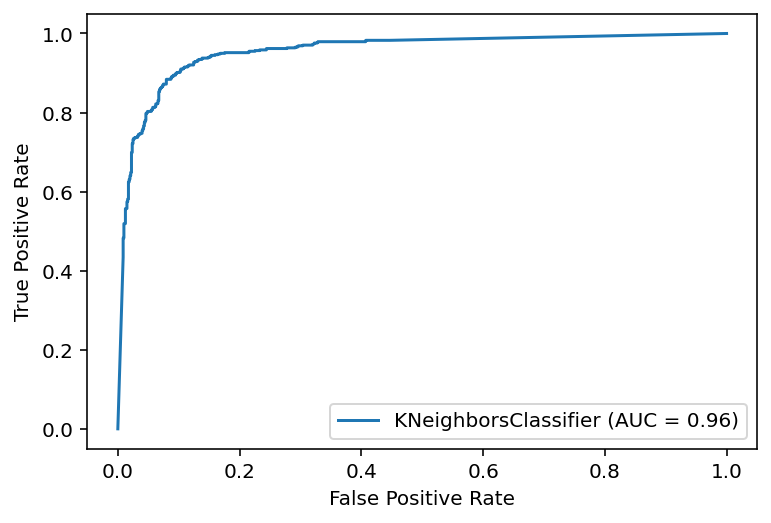

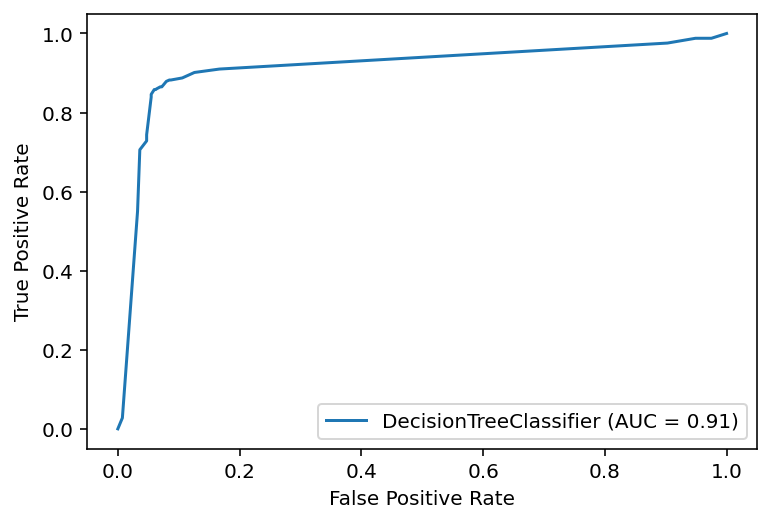

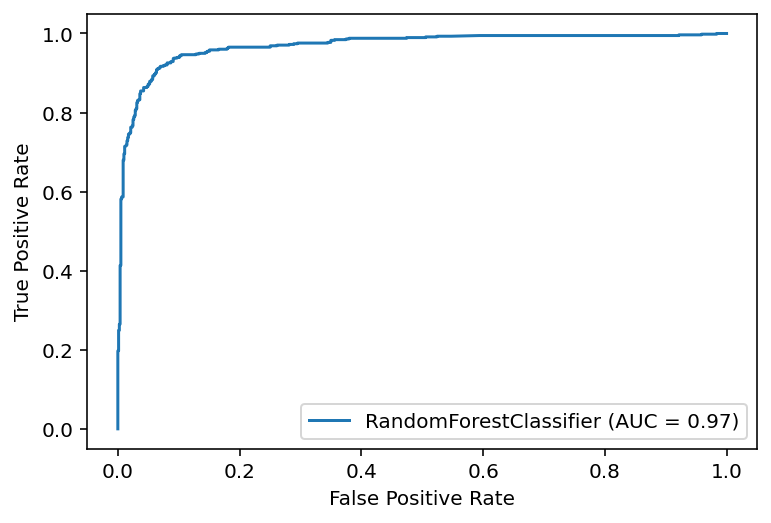

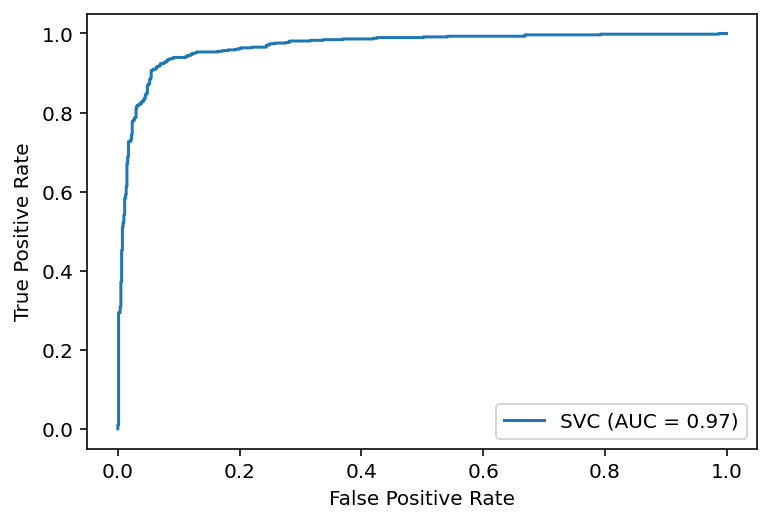

In [78]:
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=10,weights='distance')
knn.fit(X_train_s,y_train)
estimations=knn.predict_proba(X_test_s)
y_scores=estimations[:,1]
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_scores)
knn_auc=metrics.auc(fpr,tpr)
metrics.plot_roc_curve(knn,X_test_s,y_test)

DT=tree.DecisionTreeClassifier(max_leaf_nodes=50)
DT.fit(X_train_s,y_train)
estimations=DT.predict_proba(X_test_s)
y_scores=estimations[:,1]
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_scores)
DT_auc=metrics.auc(fpr,tpr)
metrics.plot_roc_curve(DT,X_test_s,y_test)

RF=ensemble.RandomForestClassifier(n_estimators=50,max_leaf_nodes=50)
RF.fit(X_train_s,y_train)
estimations=RF.predict_proba(X_test_s)
y_scores=estimations[:,1]
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_scores)
RF_auc=metrics.auc(fpr,tpr)
metrics.plot_roc_curve(RF,X_test_s,y_test)

SVC=svm.SVC(C=3.2,tol=0.049606282874006216,probability=True)
SVC.fit(X_train_s,y_train)
estimations=SVC.predict_proba(X_test_s)
y_scores=estimations[:,1]
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_scores)
SVC_auc=metrics.auc(fpr,tpr)
metrics.plot_roc_curve(SVC,X_test_s,y_test)



### 8.2.2 AUC

In [79]:

print(knn_auc)
print(DT_auc)
print(RF_auc)
print(SVC_auc)

0.9551379558489574
0.9130488177983082
0.9688753678894457
0.9678767338742692
